# Naive Bayes

## Import Libraries

In [1]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_curve
from sklearn.model_selection import StratifiedKFold
from sklearn.naive_bayes import GaussianNB
import numpy as np
import pandas as pd
import pickle
import sys
import os

## Load the Data

In [2]:
train = pd.read_csv('pca_train_2.csv').fillna('').values
test = pd.read_csv('pca_test_2.csv').fillna('').values

## Split into X and Y

In [3]:
X_train, Y_train = train[:,:-1], train[:,-1]
X_test, Y_test = test[:,:-1], test[:,-1]

## Train Naive Bayes

In [4]:
clf = None
if not os.path.exists('gnb.pkl'):
    clf = GaussianNB()
    skf = StratifiedKFold(n_splits=10)
    for _, train_index in skf.split(X_train, Y_train, Y_train):
        clf.partial_fit(X_train[train_index], Y_train[train_index], [0,1])
        print('.', end='')
else:
    clf = pickle.load(open('gnb.pkl', 'rb'))

## Save Naive Bayes Model

In [5]:
if not os.path.exists('gnb.pkl'):
    pickle.dump(clf, open('gnb.pkl', 'wb'))

## Predict and Output Results

0.45333720293650115
0.39317576339893673
0.8845971754490964
0.5443880664295491


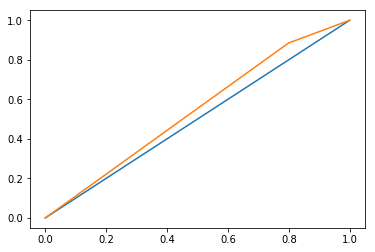

In [14]:
Y_pred = clf.predict(X_test)
print(accuracy_score(Y_test, Y_pred))
print(precision_score(Y_test, Y_pred))
print(recall_score(Y_test, Y_pred))
print(f1_score(Y_test, Y_pred))
roc = roc_curve(Y_test, Y_pred, pos_label=1, drop_intermediate=False)
import matplotlib.pyplot as plt
plt.plot([0,1], [0,1])
plt.plot(roc[0], roc[1])
plt.show()